In [ ]:
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
plt.style.use(style='seaborn')

In [ ]:
df=pd.read_csv('/content/BRVM 10 - Données Historiques.csv')

In [ ]:
df.head(5)

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Vol.,Variation %
0,27/08/2021,"138,11","137,73","138,90","137,73",-,"0,28%"
1,26/08/2021,"137,73","138,18","138,75","137,73",-,"-0,33%"
2,25/08/2021,"138,18","139,39","139,39","138,18",-,"-0,87%"
3,24/08/2021,"139,39","138,77","139,39","138,77",-,"0,45%"
4,23/08/2021,"138,77","138,93","139,59","138,77",-,"-0,12%"


In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%d/%m/%Y')
df.index = df['Date']

In [ ]:
df=df[["Dernier"]].copy()
df1=df.replace('[^\d].','',regex=True).astype(float)

In [ ]:
df1.describe()

,Dernier
count,1242.000000
mean,1738.037842
std,464.690070
min,1117.000000
25%,1312.000000
50%,1591.000000
75%,2141.000000
max,2658.000000


In [ ]:
#train test split
n=int(len(df1)*0.8)
train=df1.Dernier[:n]
test=df1.Dernier[n:]

In [ ]:
print(len(train))
print(len(test))

993
249


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model=ARIMA(train,order=(0,1,0))
result=model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Dernier   No. Observations:                  992
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4110.329
Method:                           css   S.D. of innovations             15.249
Date:                Thu, 14 Oct 2021   AIC                           8224.658
Time:                        15:24:24   BIC                           8234.457
Sample:                             1   HQIC                          8228.383
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7752      0.484      1.601      0.110      -0.174       1.724
==============================================================================
"""

In [ ]:
step=50
fc,se,conf=result.forecast(step)

In [ ]:
fc

array([2150.77520161, 2151.55040323, 2152.32560484, 2153.10080645,
       2153.87600806, 2154.65120968, 2155.42641129, 2156.2016129 ,
       2156.97681452, 2157.75201613, 2158.52721774, 2159.30241935,
       2160.07762097, 2160.85282258, 2161.62802419, 2162.40322581,
       2163.17842742, 2163.95362903, 2164.72883065, 2165.50403226,
       2166.27923387, 2167.05443548, 2167.8296371 , 2168.60483871,
       2169.38004032, 2170.15524194, 2170.93044355, 2171.70564516,
       2172.48084677, 2173.25604839, 2174.03125   , 2174.80645161,
       2175.58165323, 2176.35685484, 2177.13205645, 2177.90725806,
       2178.68245968, 2179.45766129, 2180.2328629 , 2181.00806452,
       2181.78326613, 2182.55846774, 2183.33366935, 2184.10887097,
       2184.88407258, 2185.65927419, 2186.43447581, 2187.20967742,
       2187.98487903, 2188.76008065])

In [ ]:
fc=pd.Series(fc,index=test[:step].index)
lower=pd.Series(conf[:,0],index=test[:step].index)
upper=pd.Series(conf[:,1],index=test[:step].index)

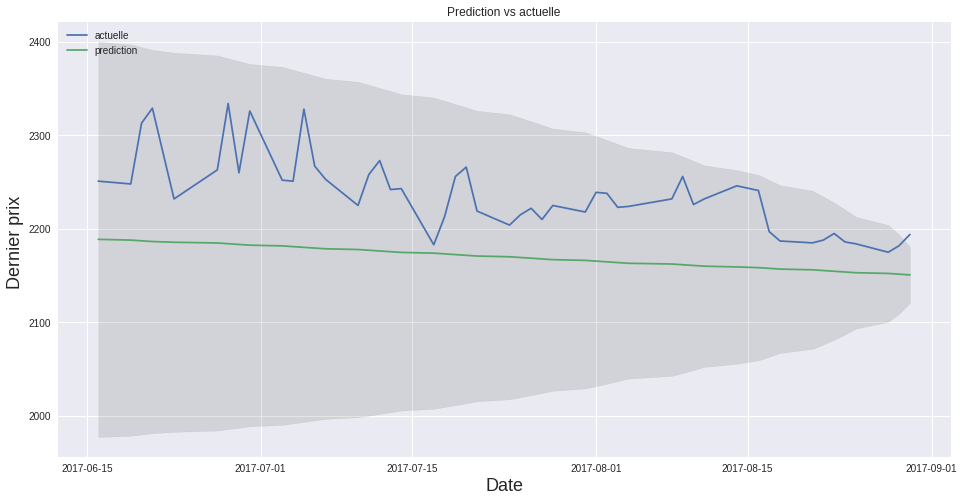

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(test[:step],label="actuelle")
plt.plot(fc,label="prediction")
plt.title("Prediction vs actuelle")
plt.fill_between(lower.index,lower,upper,color='k',alpha=0.1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Dernier prix ',fontsize=18)
plt.legend(loc='upper left')
plt.show()